#### Adicionando o caminho do projeto ao path

In [39]:
import os
os.chdir('/Users/edithvidal/Documents/Github/data_science_analysis/')

#### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [40]:
%pip install missingno
%pip install requests


import numpy as np
import pandas as pd
import missingno as msno
import requests
import json
import helper.graph_helper as graph

%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Lendo os dados da base única de 2018 a 2024

In [41]:
df_accidents = pd.read_csv(
    "acquisition/datatran2018_2024_v0.csv"
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_1247/1068564677.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436718 entries, 0 to 436717
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      436718 non-null  float64
 1   data_inversa            436718 non-null  object 
 2   dia_semana              436718 non-null  object 
 3   horario                 436718 non-null  object 
 4   uf                      436718 non-null  object 
 5   br                      436267 non-null  float64
 6   km                      436267 non-null  object 
 7   municipio               436718 non-null  object 
 8   causa_acidente          436718 non-null  object 
 9   tipo_acidente           436718 non-null  object 
 10  classificacao_acidente  436715 non-null  object 
 11  fase_dia                436718 non-null  object 
 12  sentido_via             436718 non-null  object 
 13  condicao_metereologica  436718 non-null  object 
 14  tipo_pista          

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

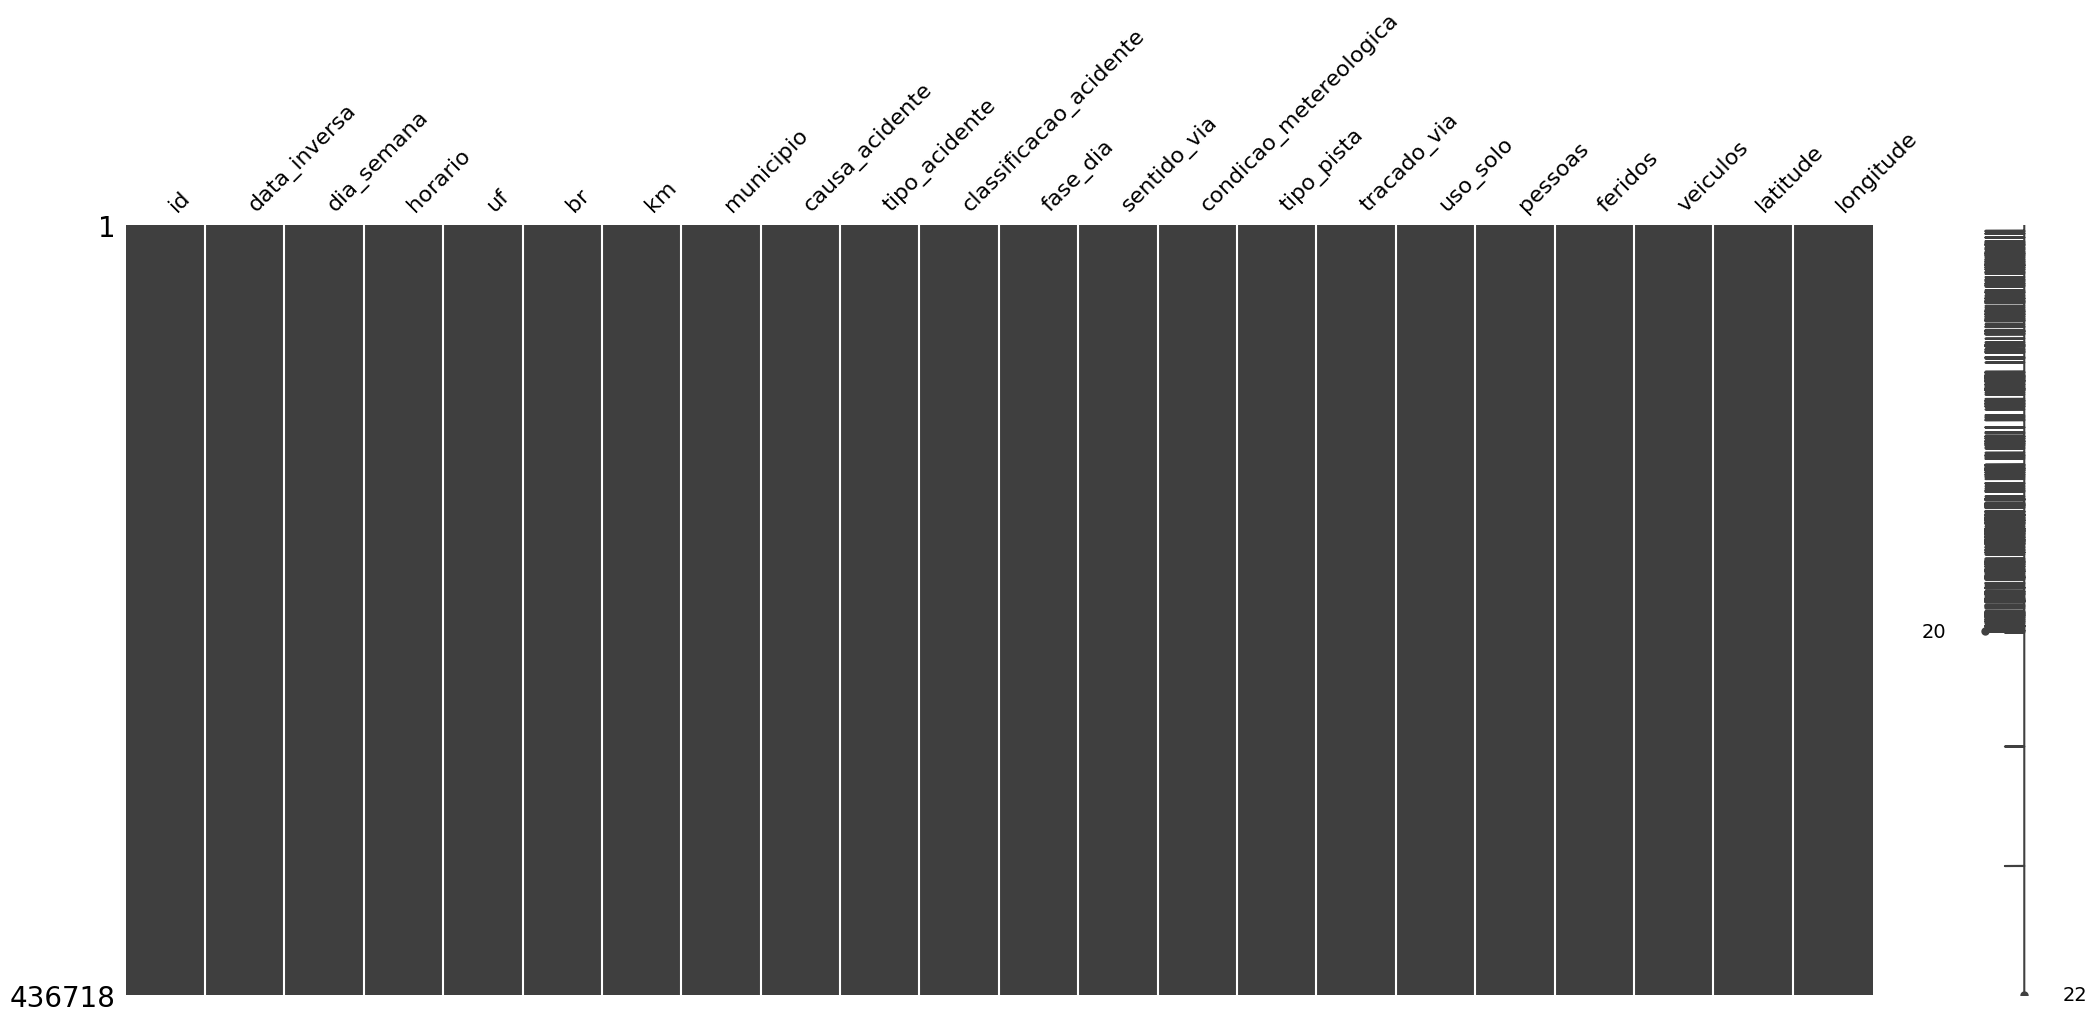

In [42]:
msno.matrix(df=df_accidents)

#### Criando funções auxiliares para tratar o dataframe

In [43]:
def fill_na_numerical(df, value):
    df = pd.to_numeric(
        df, errors="coerce").fillna(0).astype(int)

    return np.where(df != 0, df.astype(str), value)


def capitalize(df):
    return df.apply(lambda data: data.capitalize())


def drop_rows(df, column, frequency):
    counts = df[column].value_counts()
    counts = counts[counts <= frequency].index

    indexes = df[df[column].isin(counts)].index
    print(f'Índices a serem removidos: {indexes}')

    return df.drop(indexes)

#### Verificando informações da coluna "br" para identificar dados faltantes

In [44]:
df_accidents["br"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: br
Non-Null Count   Dtype  
--------------   -----  
436267 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


#### Verificando dados estatísticos da coluna "br"para avaliar a necessidade de tratamento dos dados

In [45]:
df_accidents["br"].describe()

count    436267.000000
mean        212.121939
std         130.577461
min           0.000000
25%         101.000000
50%         158.000000
75%         324.000000
max         498.000000
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" para avaliar a necessidade de tratamento dos dados

In [46]:
df_accidents["br"].value_counts().head()

br
101.0    73787
116.0    65465
381.0    21030
40.0     20747
153.0    16902
Name: count, dtype: int64

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [47]:
df_accidents["br"] = fill_na_numerical(
    df_accidents["br"], "Desconhecido")
df_accidents["br"].value_counts().head()

br
101    73787
116    65465
381    21030
40     20747
153    16902
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "br" após o tratamento dos dados

In [48]:
df_accidents["br"].describe()

count     436718
unique       132
top          101
freq       73787
Name: br, dtype: object

#### Verificando informações da coluna "km" para identificar dados faltantes

In [49]:
df_accidents["km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: km
Non-Null Count   Dtype 
--------------   ----- 
436267 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "km"para avaliar a necessidade de tratamento dos dados

In [50]:
df_accidents["km"].describe()

count     436267
unique      9740
top            1
freq        1911
Name: km, dtype: object

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "km"

In [51]:
df_accidents["km"] = fill_na_numerical(
    df_accidents["km"], "Desconhecido")
df_accidents["km"].value_counts().head()

km
Desconhecido    191360
1                 1911
3                 1760
2                 1755
5                 1637
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "km" após o tratamento dos dados

In [52]:
df_accidents["km"].describe()

count           436718
unique            1198
top       Desconhecido
freq            191360
Name: km, dtype: object

#### Verificando informações da coluna "data_inversa"

In [53]:
df_accidents["data_inversa"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: data_inversa
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


#### Verificando dados estatísticos da coluna "data_inversa"para avaliar a necessidade de tratamento dos dados

In [54]:
df_accidents["data_inversa"].describe()

count         436718
unique          2373
top       2018-02-10
freq             325
Name: data_inversa, dtype: object

#### Verificando a frequência dos valores da coluna "data_inversa" para avaliar a necessidade de tratamento dos dados

In [55]:
df_accidents["data_inversa"].value_counts().head()

data_inversa
2018-02-10    325
2018-12-22    325
2024-12-21    319
2018-02-09    313
2023-12-23    303
Name: count, dtype: int64

#### Convertendo a coluna data_inversa para Datetime

In [56]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format="%Y-%m-%d")
df_accidents.dtypes

id                               float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                                object
km                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int64
feridos                            int64
veiculos                           int64
latitude                          object
longitude                         object
dtype: object

#### Ordenando o dataframe por data (crescente)

In [57]:
df_accidents = df_accidents.sort_values(by="data_inversa")
df_accidents.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,feridos,veiculos,latitude,longitude
0,99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116,Desconhecido,RESENDE,Condutor Dormindo,Saída de leito carroçável,...,Decrescente,Nublado,Múltipla,Reta,Sim,5,4,1,"-22,46937","-44,44705"
141,100138.0,2018-01-01,segunda-feira,16:32:00,RO,364,Desconhecido,CACOAL,Falta de Atenção à Condução,Colisão traseira,...,Crescente,Nublado,Simples,Reta,Não,2,0,2,"-11,48946231","-61,38111376"
142,100139.0,2018-01-01,segunda-feira,18:20:00,RS,392,83,PELOTAS,Não guardar distância de segurança,Engavetamento,...,Decrescente,Céu Claro,Simples,Não Informado,Não,3,0,3,"-31,653152","-52,471169"
143,100140.0,2018-01-01,segunda-feira,18:20:00,SC,101,Desconhecido,BARRA VELHA,Falta de Atenção à Condução,Colisão lateral,...,Decrescente,Céu Claro,Dupla,Não Informado,Não,5,2,2,"-26,62039854","-48,71735305"
144,100141.0,2018-01-01,segunda-feira,17:35:00,PB,230,28,JOAO PESSOA,Falta de Atenção à Condução,Colisão traseira,...,Crescente,Céu Claro,Dupla,Reta,Sim,3,1,2,"-7,1651","-34,8941"


#### Verificando dados estatísticos da coluna "data_inversa" após do tratamento dos dados

In [58]:
df_accidents["data_inversa"].describe()

count                           436718
mean     2021-07-09 01:52:49.666466560
min                2018-01-01 00:00:00
25%                2019-08-11 00:00:00
50%                2021-04-18 00:00:00
75%                2023-06-26 00:00:00
max                2024-12-31 00:00:00
Name: data_inversa, dtype: object

#### Criando coluna auxiliar mes_ano para facilitar análise futura

In [59]:
df_accidents["mes_ano"] = df_accidents["data_inversa"].dt.to_period("M")
df_accidents["mes_ano"].value_counts().sort_index()

mes_ano
2018-01    6940
2018-02    6192
2018-03    6684
2018-04    5530
2018-05    4818
           ... 
2024-08    6167
2024-09    6222
2024-10    6406
2024-11    6135
2024-12    6587
Freq: M, Name: count, Length: 78, dtype: int64

In [60]:
df_accidents["mes_ano"].dt.year

0         2018
141       2018
142       2018
143       2018
144       2018
          ... 
381928    2024
381927    2024
381926    2024
381924    2024
436366    2024
Name: mes_ano, Length: 436718, dtype: int64

#### Obtendo lista de feriados obtida de uma base de dados externa

In [61]:
from datetime import datetime


def get_holidays(year):
    try:
        response = requests.get(
            f"https://brasilapi.com.br/api/feriados/v1/{year}")
        response.raise_for_status()
        return [{
            "date": datetime.strptime(data["date"], "%Y-%m-%d").strftime("%Y-%m-%d"),
            "name": data["name"]
        } for data in response.json()]
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar feriados de {year}: {e}")
        return []

#### Criando coluna feriado preenchendo os registros com o nome do feriado ou dia útil à partir de uma lista de feriados obtida de uma base de dados externa

In [62]:
def get_holidays_for_years(years):
    holidays_dict = {}
    for year in years:
        holidays = get_holidays(year)
        holidays_dict.update({
            pd.to_datetime(holiday["date"]).date(): holiday["name"] for holiday in holidays
        })

    return holidays_dict


df_accidents["tipo_data"] = df_accidents["data_inversa"].map(
    get_holidays_for_years([
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
        2024]
    )).fillna("Dia útil")
df_accidents["tipo_data"].value_counts()

tipo_data
Dia útil                    421780
Confraternização mundial      1439
Tiradentes                    1282
Dia do trabalho               1276
Proclamação da República      1265
Nossa Senhora Aparecida       1260
Independência do Brasil       1253
Páscoa                        1237
Corpus Christi                1218
Carnaval                      1199
Natal                         1158
Sexta-feira Santa             1131
Finados                       1065
Dia da consciência negra       155
Name: count, dtype: int64

#### Verificando informações da coluna "dia_semana"

In [63]:
df_accidents["dia_semana"].info()

<class 'pandas.core.series.Series'>
Index: 436718 entries, 0 to 436366
Series name: dia_semana
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "dia_semana"para avaliar a necessidade de tratamento dos dados

In [64]:
df_accidents["dia_semana"].describe()

count      436718
unique          7
top       domingo
freq        72073
Name: dia_semana, dtype: object

#### Verificando a frequência dos valores da coluna "dia_semana" para avaliar a necessidade de tratamento dos dados

In [65]:
df_accidents["dia_semana"].value_counts()

dia_semana
domingo          72073
sábado           71853
sexta-feira      67288
segunda-feira    59522
quinta-feira     56770
quarta-feira     55104
terça-feira      54108
Name: count, dtype: int64

#### Tratamento da coluna "dia_semana" para corrigir codificação

In [66]:
df_accidents["dia_semana"] = pd.to_datetime(
    df_accidents["data_inversa"], format='%Y/%m/%d').dt.day_of_week.map({
        0: "Segunda-feira",
        1: "Terça-feira",
        2: "Quarta-feira",
        3: "Quinta-feira",
        4: "Sexta-feira",
        5: "Sábado",
        6: "Domingo"
    })
df_accidents["dia_semana"].value_counts().head()

dia_semana
Domingo          72073
Sábado           71853
Sexta-feira      67288
Segunda-feira    59522
Quinta-feira     56770
Name: count, dtype: int64

#### Verificando informações da coluna "causa_acidente"

In [67]:
df_accidents["causa_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 436718 entries, 0 to 436366
Series name: causa_acidente
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "causa_acidente"para avaliar a necessidade de tratamento dos dados

In [68]:
df_accidents["causa_acidente"].describe()

count                          436718
unique                             91
top       Falta de Atenção à Condução
freq                            73231
Name: causa_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "causa_acidente" para avaliar a necessidade de tratamento dos dados

In [69]:
df_accidents["causa_acidente"].value_counts()

causa_acidente
Falta de Atenção à Condução                          73231
Velocidade Incompatível                              35819
Reação tardia ou ineficiente do condutor             32348
Ausência de reação do condutor                       29866
Desobediência às normas de trânsito pelo condutor    24089
                                                     ...  
Redutor de velocidade em desacordo                      28
Faróis desregulados                                     24
Sinalização encoberta                                   16
Obstrução Via tentativa Assalto                         10
Sistema de drenagem ineficiente                          7
Name: count, Length: 91, dtype: int64

#### Tratamento da coluna causa_acidente para unificar causas de acidentes similares

In [70]:
def get_causes():
    try:
        with open("wrangling/causas_acidentes.json", "r", encoding="utf-8") as file:
            return json.load(file)
    except Exception as exception:
        print(exception)
        return {}


def get_condition_to_make_changes(causes):
    return df_accidents["causa_acidente"].isin(
        causes.keys())


def get_value_if_match(causes):
    return df_accidents["causa_acidente"].map(
        lambda cause: causes.get(cause, cause).capitalize())


def get_value_if_not_match():
    return df_accidents["causa_acidente"].str.capitalize()


causes = get_causes()
df_accidents["causa_acidente"] = np.where(
    get_condition_to_make_changes(causes), get_value_if_match(causes), get_value_if_not_match())
df_accidents["causa_acidente"].value_counts().head()

causa_acidente
Falta de atenção à condução                                      73231
Velocidade incompatível                                          35819
Reação tardia ou ineficiente do condutor                         32348
Ausência de reação do condutor                                   29866
Ingestão de álcool e/ou substâncias psicoativas pelo condutor    29622
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_acidente"

In [71]:
df_accidents["tipo_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 436718 entries, 0 to 436366
Series name: tipo_acidente
Non-Null Count   Dtype 
--------------   ----- 
436718 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "tipo_acidente"para avaliar a necessidade de tratamento dos dados

In [72]:
df_accidents["tipo_acidente"].describe()

count               436718
unique                  21
top       Colisão traseira
freq                 82354
Name: tipo_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_acidente" para avaliar a necessidade de tratamento dos dados

In [73]:
df_accidents["tipo_acidente"].value_counts()

tipo_acidente
Colisão traseira                   82354
Saída de leito carroçável          68689
Colisão transversal                54937
Tombamento                         36266
Colisão frontal                    29477
Colisão lateral                    24809
Colisão lateral mesmo sentido      23563
Atropelamento de Pedestre          20296
Queda de ocupante de veículo       19623
Colisão com objeto                 17080
Colisão com objeto estático        14404
Capotamento                        12324
Incêndio                            8259
Atropelamento de Animal             7579
Engavetamento                       6782
Colisão lateral sentido oposto      6564
Eventos atípicos                    1054
Derramamento de carga               1044
Colisão com objeto em movimento      967
Danos eventuais                      635
Sinistro pessoal de trânsito          12
Name: count, dtype: int64

#### Tratamento da coluna "tipo_acidente" para capitalizar os dados

In [74]:
df_accidents["tipo_acidente"] = capitalize(
    df_accidents["tipo_acidente"])
df_accidents["tipo_acidente"].value_counts().head()

tipo_acidente
Colisão traseira             82354
Saída de leito carroçável    68689
Colisão transversal          54937
Tombamento                   36266
Colisão frontal              29477
Name: count, dtype: int64

#### Verificando informações da coluna "classificacao_acidente"

In [75]:
df_accidents["classificacao_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 436718 entries, 0 to 436366
Series name: classificacao_acidente
Non-Null Count   Dtype 
--------------   ----- 
436715 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [76]:
df_accidents["classificacao_acidente"].describe()

count                  436715
unique                      3
top       Com Vítimas Feridas
freq                   327874
Name: classificacao_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [77]:
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com Vítimas Feridas    327874
Sem Vítimas             78301
Com Vítimas Fatais      30540
Name: count, dtype: int64

#### Tratamento da coluna "classificacao_acidente" para definir dados faltantes como "Sem classificação"

In [78]:
def get_condition():
    return df_accidents[df_accidents['classificacao_acidente'].isna()]


df_accidents.drop(get_condition().index, inplace=True)

df_accidents["classificacao_acidente"] = capitalize(
    df_accidents["classificacao_acidente"])
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com vítimas feridas    327874
Sem vítimas             78301
Com vítimas fatais      30540
Name: count, dtype: int64

#### Verificando informações da coluna "fase_dia"

In [79]:
df_accidents["fase_dia"].info()

<class 'pandas.core.series.Series'>
Index: 436715 entries, 0 to 436366
Series name: fase_dia
Non-Null Count   Dtype 
--------------   ----- 
436715 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [80]:
df_accidents["fase_dia"].describe()

count        436715
unique            4
top       Pleno dia
freq         238933
Name: fase_dia, dtype: object

#### Verificando a frequência dos valores da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [81]:
df_accidents["fase_dia"].value_counts()

fase_dia
Pleno dia      238933
Plena Noite    152660
Anoitecer       24066
Amanhecer       21056
Name: count, dtype: int64

#### Tratamento da coluna "fase_dia" para capitalizar os dados

In [82]:
periods = {
    "00h às 06h (madrugada)": (0, 5),
    "06h às 12h (manhã)": (6, 11),
    "12h às 18h (tarde)": (12, 17),
    "18h às 00h (noite)": (18, 23)
}


def group_by_hour(df):
    return df[df["horario"].notna()]["horario"]


def to_datetime(df):
    return pd.to_datetime(df, format="%H:%M:%S").dt.hour


df = group_by_hour(df_accidents)
df = to_datetime(df)
df_accidents["fase_dia"] = df.apply(
    lambda hour: next(period for period, (start, end)
                      in periods.items() if start <= hour <= end)
)
df = df_accidents["fase_dia"].value_counts()
df.head()

fase_dia
12h às 18h (tarde)        133961
18h às 00h (noite)        126481
06h às 12h (manhã)        121502
00h às 06h (madrugada)     54771
Name: count, dtype: int64

#### Verificando informações da coluna "condicao_metereologica"

In [83]:
df_accidents["condicao_metereologica"].info()

<class 'pandas.core.series.Series'>
Index: 436715 entries, 0 to 436366
Series name: condicao_metereologica
Non-Null Count   Dtype 
--------------   ----- 
436715 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [84]:
df_accidents["condicao_metereologica"].describe()

count        436715
unique           10
top       Céu Claro
freq         262858
Name: condicao_metereologica, dtype: object

#### Verificando a frequência dos valores da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [85]:
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262858
Nublado              71754
Chuva                47270
Sol                  29126
Garoa/Chuvisco       15289
Ignorado              5898
Nevoeiro/Neblina      3671
Vento                  825
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Tratamento da coluna "condicao_metereologica" para remover valor "Ignorado"

In [86]:
def get_condition():
    return df_accidents[df_accidents['condicao_metereologica'] == "Ignorado"]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262858
Nublado              71754
Chuva                47270
Sol                  29126
Garoa/Chuvisco       15289
Nevoeiro/Neblina      3671
Vento                  825
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Verificando informações da coluna "uso_solo"

In [87]:
df_accidents["uso_solo"].info()

<class 'pandas.core.series.Series'>
Index: 430817 entries, 0 to 436366
Series name: uso_solo
Non-Null Count   Dtype 
--------------   ----- 
430817 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [88]:
df_accidents["uso_solo"].describe()

count     430817
unique         2
top          Não
freq      242154
Name: uso_solo, dtype: object

#### Verificando a frequência dos valores da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [89]:
df_accidents["uso_solo"].value_counts()

uso_solo
Não    242154
Sim    188663
Name: count, dtype: int64

#### Tratamento da coluna "uso_solo" para alterar para "Urbano" quando "Sim" e "Rural" quando "Não"

In [90]:
df_accidents["uso_solo"] = np.where(
    df_accidents["uso_solo"] == "Sim", "Urbano", "Rural")

df_accidents["uso_solo"].value_counts().head()

uso_solo
Rural     242154
Urbano    188663
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_pista"

In [91]:
df_accidents["tipo_pista"].info()

<class 'pandas.core.series.Series'>
Index: 430817 entries, 0 to 436366
Series name: tipo_pista
Non-Null Count   Dtype 
--------------   ----- 
430817 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [92]:
df_accidents["tipo_pista"].describe()

count      430817
unique          3
top       Simples
freq       214535
Name: tipo_pista, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [93]:
df_accidents["tipo_pista"].value_counts()

tipo_pista
Simples     214535
Dupla       178675
Múltipla     37607
Name: count, dtype: int64

#### Verificando informações da coluna "sentido_via"

In [94]:
df_accidents["sentido_via"].info()

<class 'pandas.core.series.Series'>
Index: 430817 entries, 0 to 436366
Series name: sentido_via
Non-Null Count   Dtype 
--------------   ----- 
430817 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [95]:
df_accidents["sentido_via"].describe()

count        430817
unique            3
top       Crescente
freq         230480
Name: sentido_via, dtype: object

#### Verificando a frequência dos valores da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [96]:
df_accidents["sentido_via"].value_counts()

sentido_via
Crescente        230480
Decrescente      199363
Não Informado       974
Name: count, dtype: int64

#### Verificando informações da coluna "tracado_via"

In [97]:
df_accidents["tracado_via"].info()

<class 'pandas.core.series.Series'>
Index: 430817 entries, 0 to 436366
Series name: tracado_via
Non-Null Count   Dtype 
--------------   ----- 
430817 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [98]:
df_accidents["tracado_via"].describe()

count     430817
unique       969
top         Reta
freq      254389
Name: tracado_via, dtype: object

#### Verificando a frequência dos valores da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [99]:
tracado_via = df_accidents["tracado_via"].value_counts()
tracado_via

tracado_via
Reta                                                              254389
Curva                                                              61897
Não Informado                                                      25231
Interseção de vias                                                 10597
Rotatória                                                           7737
                                                                   ...  
Viaduto;Declive;Em Obras                                               1
Interseção de Vias;Aclive;Reta;Retorno Regulamentado;Rotatória         1
Curva;Ponte;Interseção de Vias;Aclive;Em Obras;Viaduto                 1
Curva;Túnel;Viaduto                                                    1
Retorno Regulamentado;Curva;Interseção de Vias;Viaduto                 1
Name: count, Length: 969, dtype: int64

#### Exportando os traçados de via encontrados (973) para um arquivo para analisar como fazer o tratamento

In [100]:
tracado_via.index.to_frame(
    name="tracado_via").to_csv("wrangling/tracado_via.csv", index=False)

#### Removendo a coluna tracado_via, pois seus dados estão muito complexos para serem agrupados. Em alguns casos existem dados com Ponte;Reta e Reta;Ponte. Dessa forma, não é possível saber qual o valor correto. A remoção desta coluna não deve influenciar nas análises posteriores

In [101]:
df_accidents = df_accidents.drop(columns=[
    "tracado_via"
])
df_accidents.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,condicao_metereologica,tipo_pista,uso_solo,pessoas,feridos,veiculos,latitude,longitude,mes_ano,tipo_data
0,99973.0,2018-01-01,Segunda-feira,00:20:00,RJ,116,Desconhecido,RESENDE,Condutor dormindo,Saída de leito carroçável,...,Nublado,Múltipla,Urbano,5,4,1,"-22,46937","-44,44705",2018-01,Confraternização mundial
141,100138.0,2018-01-01,Segunda-feira,16:32:00,RO,364,Desconhecido,CACOAL,Falta de atenção à condução,Colisão traseira,...,Nublado,Simples,Rural,2,0,2,"-11,48946231","-61,38111376",2018-01,Confraternização mundial
142,100139.0,2018-01-01,Segunda-feira,18:20:00,RS,392,83,PELOTAS,Condutor deixou de manter distância do veículo...,Engavetamento,...,Céu Claro,Simples,Rural,3,0,3,"-31,653152","-52,471169",2018-01,Confraternização mundial
143,100140.0,2018-01-01,Segunda-feira,18:20:00,SC,101,Desconhecido,BARRA VELHA,Falta de atenção à condução,Colisão lateral,...,Céu Claro,Dupla,Rural,5,2,2,"-26,62039854","-48,71735305",2018-01,Confraternização mundial
144,100141.0,2018-01-01,Segunda-feira,17:35:00,PB,230,28,JOAO PESSOA,Falta de atenção à condução,Colisão traseira,...,Céu Claro,Dupla,Urbano,3,1,2,"-7,1651","-34,8941",2018-01,Confraternização mundial


#### Verificando informações da coluna "pessoas"

In [102]:
df_accidents["pessoas"].info()

<class 'pandas.core.series.Series'>
Index: 430817 entries, 0 to 436366
Series name: pessoas
Non-Null Count   Dtype
--------------   -----
430817 non-null  int64
dtypes: int64(1)
memory usage: 6.6 MB


#### Verificando dados estatísticos da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [103]:
df_accidents["pessoas"].describe()

count    430817.000000
mean          2.472402
std           2.033105
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          95.000000
Name: pessoas, dtype: float64

#### Verificando a frequência dos valores da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [104]:
df_accidents["pessoas"].value_counts()

pessoas
2     176940
1     105275
3      80762
4      34008
5      16946
       ...  
77         1
95         1
68         1
93         1
66         1
Name: count, Length: 74, dtype: int64

#### Tratamento da coluna "pessoas" para remover linhas, onde a frequência da quantidade de pessoas envolvidas, em um acidente, é menor que 7 (menos de 1 ocorrência por ano)

In [105]:
df_accidents = drop_rows(
    df=df_accidents, column="pessoas", frequency=7)
df_accidents["pessoas"].describe()

Índices a serem removidos: Index([  1315,   4637,  10614,  37246,  47786,  39216,  68688,  47616,  52107,
        63681,  98051,  84793, 109157, 110602, 149317, 149151, 222001, 231264,
       268975, 264368, 271017, 280740, 275652, 247206, 298759, 317170, 317400,
       298345, 325257, 304309, 339233, 304746, 342025, 313354, 363531, 353276,
       310792, 357373, 312723, 383767, 383815, 383818, 406930, 376516, 433389,
       436698, 428430, 382047, 381762, 436043],
      dtype='int64')


count    430767.000000
mean          2.465463
std           1.925594
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          54.000000
Name: pessoas, dtype: float64

#### Gerando histograma para a coluna "pessoas" a fim de entender melhor a distribuição de pessoas, visto que foram identificados valores discrepantes na análise anterior

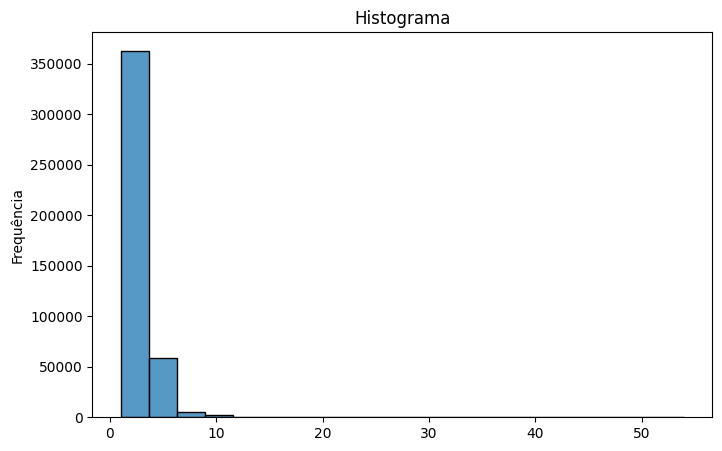

In [106]:
graph.draw_histplot(df=df_accidents["pessoas"])

#### Gerando boxplot para a coluna "pessoas" a fim de entender melhor a distribuição de pessoas à partir do histograma acima

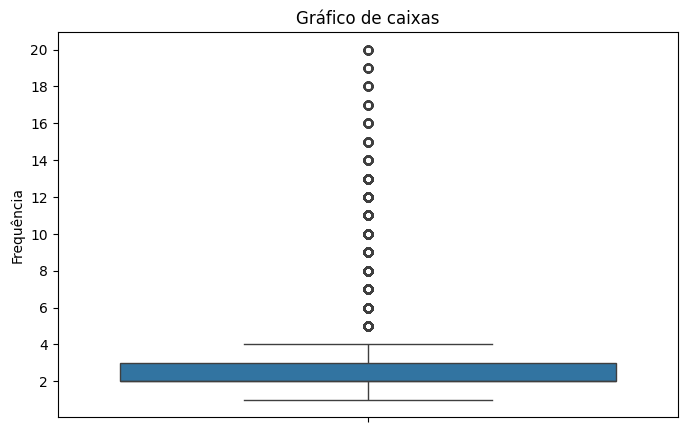

In [107]:
data = df_accidents[df_accidents["pessoas"] <= 20]
graph.draw_boxplot(
    df=data["pessoas"], multipleLocator=2) # type: ignore

#### Verificando informações da coluna "veiculos"

In [108]:
df_accidents["veiculos"].info()

<class 'pandas.core.series.Series'>
Index: 430767 entries, 0 to 436366
Series name: veiculos
Non-Null Count   Dtype
--------------   -----
430767 non-null  int64
dtypes: int64(1)
memory usage: 6.6 MB


#### Verificando dados estatísticos da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [109]:
df_accidents["veiculos"].describe()

count    430767.000000
mean          1.810392
std           0.935169
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          28.000000
Name: veiculos, dtype: float64

#### Verificando a frequência dos valores da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [110]:
df_accidents["veiculos"].value_counts()

veiculos
2     203362
1     171168
3      37328
4      11548
5       4294
6       1530
7        707
8        330
9        165
10       109
11        61
12        53
13        41
14        31
15        16
16         7
17         5
20         3
19         2
23         1
22         1
28         1
18         1
25         1
26         1
24         1
Name: count, dtype: int64

In [111]:
df_accidents = drop_rows(
    df=df_accidents, column="veiculos", frequency=7)
df_accidents["veiculos"].describe()

Índices a serem removidos: Index([187092, 236889, 237563, 237997, 241966, 296112, 297764, 300984, 303954,
       304795, 306197, 307267, 308142, 311374, 313115, 370324, 369602, 379739,
       374491, 376377, 377648, 380328, 380543, 381599],
      dtype='int64')


count    430743.000000
mean          1.809422
std           0.925755
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: veiculos, dtype: float64

#### Gerando histograma para a coluna "veiculos" a fim de entender melhor a distribuição de veículos, visto que foram identificados valores discrepantes na análise anterior

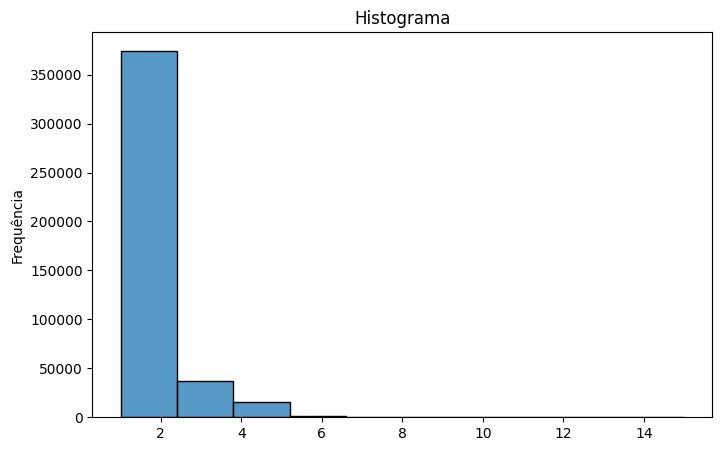

In [112]:
graph.draw_histplot(
    df=df_accidents["veiculos"], bins=10)

#### Gerando boxplot para a coluna "veiculos" a fim de entender melhor a distribuição de veículos à partir do histograma acima

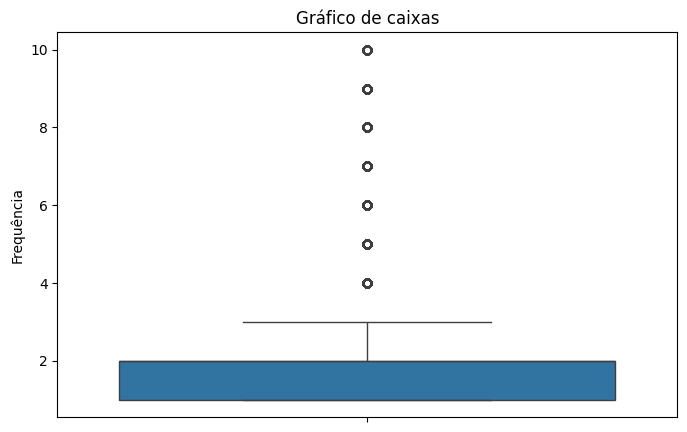

In [113]:
data = df_accidents[df_accidents["veiculos"] <= 10]
graph.draw_boxplot(
    df=data["veiculos"], multipleLocator=2) # type: ignore

#### Reordenando o dataframe antes de salvar

In [114]:
df_accidents = df_accidents[[
    "id",
    "data_inversa",
    "tipo_data",
    'mes_ano',
    "dia_semana",
    "horario",
    "fase_dia",
    "condicao_metereologica",
    "uf",
    "municipio",
    "br",
    "km",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "tipo_acidente",
    "causa_acidente",
    "classificacao_acidente",
    "pessoas",
    "veiculos",
    "latitude",
    "longitude"
]]
df_accidents.head()

,id,data_inversa,tipo_data,mes_ano,dia_semana,horario,fase_dia,condicao_metereologica,uf,municipio,...,uso_solo,tipo_pista,sentido_via,tipo_acidente,causa_acidente,classificacao_acidente,pessoas,veiculos,latitude,longitude
0,99973.0,2018-01-01,Confraternização mundial,2018-01,Segunda-feira,00:20:00,00h às 06h (madrugada),Nublado,RJ,RESENDE,...,Urbano,Múltipla,Decrescente,Saída de leito carroçável,Condutor dormindo,Com vítimas feridas,5,1,"-22,46937","-44,44705"
141,100138.0,2018-01-01,Confraternização mundial,2018-01,Segunda-feira,16:32:00,12h às 18h (tarde),Nublado,RO,CACOAL,...,Rural,Simples,Crescente,Colisão traseira,Falta de atenção à condução,Sem vítimas,2,2,"-11,48946231","-61,38111376"
142,100139.0,2018-01-01,Confraternização mundial,2018-01,Segunda-feira,18:20:00,18h às 00h (noite),Céu Claro,RS,PELOTAS,...,Rural,Simples,Decrescente,Engavetamento,Condutor deixou de manter distância do veículo...,Sem vítimas,3,3,"-31,653152","-52,471169"
143,100140.0,2018-01-01,Confraternização mundial,2018-01,Segunda-feira,18:20:00,18h às 00h (noite),Céu Claro,SC,BARRA VELHA,...,Rural,Dupla,Decrescente,Colisão lateral,Falta de atenção à condução,Com vítimas feridas,5,2,"-26,62039854","-48,71735305"
144,100141.0,2018-01-01,Confraternização mundial,2018-01,Segunda-feira,17:35:00,12h às 18h (tarde),Céu Claro,PB,JOAO PESSOA,...,Urbano,Dupla,Crescente,Colisão traseira,Falta de atenção à condução,Com vítimas feridas,3,2,"-7,1651","-34,8941"


#### Salvando os dados em um novo CSV após o tratamento de dados

In [115]:
df_accidents.to_csv(
    path_or_buf="wrangling/datatran2018_2024_v1.csv",
    index=False
)